In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
import joblib
import warnings
warnings.filterwarnings('ignore')

In [6]:
df =pd.read_csv(r"C:\Users\aadit\OneDrive\Documents\MACHINE LEARNING\End to End ML projects\spam filter\spam.csv", encoding='latin-1')

In [7]:
df

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
#dropping
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label','messages']
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploring the data

In [10]:
df.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

## Label encoding

In [13]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,messages,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
df['messages_len'] = df.messages.apply(len)
df.head()

,label,messages,label_num,messages_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'MESSAGE LENGTH')

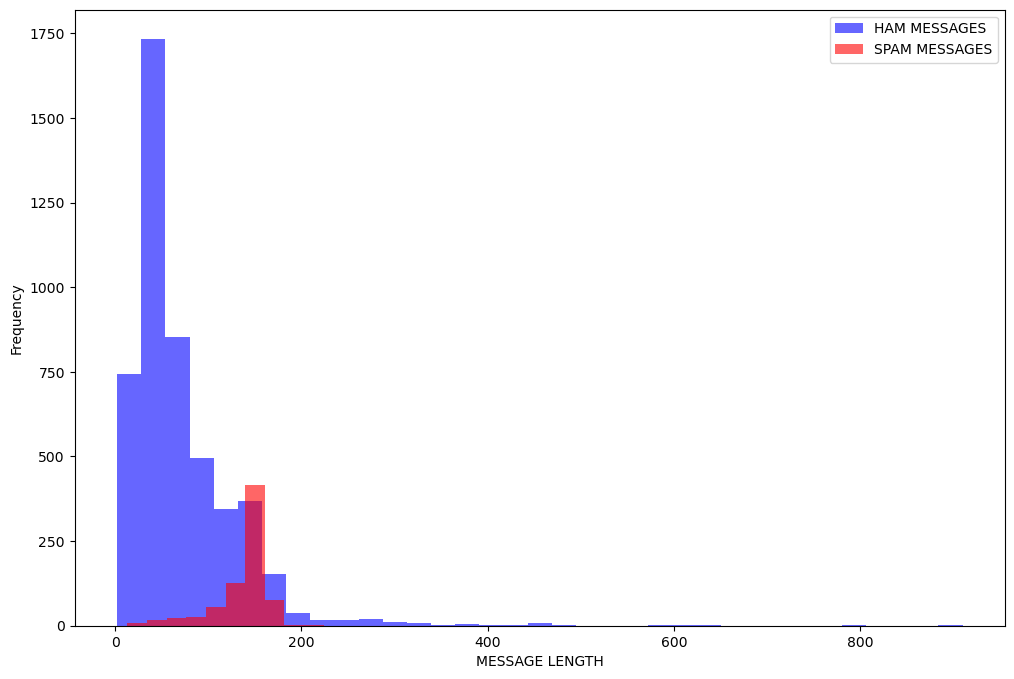

In [16]:
plt.figure(figsize=(12,8))
df[df.label=='ham'].messages_len.plot(bins=35, kind='hist', color='blue',label='HAM MESSAGES', alpha=0.6)
df[df.label=='spam'].messages_len.plot(kind='hist', color='red',label='SPAM MESSAGES',alpha=0.6)
plt.legend()
plt.xlabel("MESSAGE LENGTH")

In [17]:
df[df.label=='ham'].describe()

,label_num,messages_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [18]:
df[df.label=='spam'].describe()

,label_num,messages_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [22]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def text_process(mess):
    """
    takes in a string of text, then performs the following:
    1.remove all punctuaion
    2. remove all stopwords
    3. returns a list of the cleaned text
    """
    
    STOPWORDS = stopwords.words('english') + ['u','ur','4','2','im', 'dont', 'doin', 'ure']
    nopunc = [i for i in mess if i not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df['clean_msg'] = df.messages.apply(text_process)

In [24]:
df

,label,messages,label_num,messages_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,2nd time tried contact å£750 Pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,Ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity mood Soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...


In [27]:
# counting the frequency of each words and creating a bug of words
from collections import Counter

words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [29]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [30]:
#defining X and Y
X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)
print(vect)

CountVectorizer()


In [34]:
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [35]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [36]:
X_test_dtm = vect.transform(X_test)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [38]:
 from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [39]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 2.99 ms


MultinomialNB()

In [40]:
y_pred_class = nb.predict(X_test_dtm)

In [41]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9827709978463748

In [42]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1205,    8],
       [  16,  164]], dtype=int64)

In [45]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: clean_msg, dtype: object

In [46]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: clean_msg, dtype: object

In [47]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
# calculate AUC
metrics.roc_auc_score(y_test,y_pred_prob)

0.9774342768159751

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [49]:
y_pred = pipe.predict(X_test)

In [59]:
pipe.predict(["you have Won a prize"])

array([1], dtype=int64)

In [51]:
metrics.accuracy_score(y_test,y_pred)

0.9669777458722182

In [52]:
metrics.confusion_matrix(y_test,y_pred)

array([[1213,    0],
       [  46,  134]], dtype=int64)

In [54]:
X_test

1078                                       Convey regards
4028                         Û anyway many good evenings
958     sort code acc bank natwest reply confirm ive s...
4642                                Sorry din lock keypad
4674    Hi babe Chloe r smashed saturday night great w...
                              ...                        
3207     Oops phone died didnt even know Yeah like better
4655                                 K Ill work something
1140                      Ohas usual vijay film different
1793                              bad girl still remember
1710        promises though havent even gotten dinner yet
Name: clean_msg, Length: 1393, dtype: object

In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
import joblib
joblib.dump(pipe,'my_model_sms.joblib')

['my_model_sms.joblib']

In [77]:
my_model = joblib.load('my_model_sms.joblib')
my_model.predict([" you have won the prize"])

array([1], dtype=int64)